In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [62]:
data = pd.read_csv('TSLA.csv')

In [63]:
data.shape

(2392, 7)

In [64]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2387,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
2388,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
2389,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
2390,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000


In [65]:
data = data['Close'].values
data = data.reshape(-1, 1)
data

array([[ 4.392   ],
       [ 3.84    ],
       [ 3.222   ],
       ...,
       [86.075996],
       [82.940002],
       [83.666   ]])

In [66]:
dataset_train = np.array(data[:int(data.shape[0]*0.8)])
dataset_test = np.array(data[int(data.shape[0]*0.8):])

In [67]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [68]:
def create_dataset(data):
    x = []
    y = []
    for i in range(50, data.shape[0]):
        x.append(data[i-50:i, 0])
        y.append(data[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [69]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [70]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [71]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [72]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.keras')

Epoch 1/50
59/59 [==============================] - 7s 75ms/step - loss: 0.0236
Epoch 2/50
59/59 [==============================] - 5s 86ms/step - loss: 0.0034
Epoch 3/50
59/59 [==============================] - 5s 77ms/step - loss: 0.0035
Epoch 4/50
59/59 [==============================] - 5s 80ms/step - loss: 0.0033
Epoch 5/50
59/59 [==============================] - 5s 79ms/step - loss: 0.0028
Epoch 6/50
59/59 [==============================] - 5s 85ms/step - loss: 0.0027
Epoch 7/50
59/59 [==============================] - 5s 78ms/step - loss: 0.0029
Epoch 8/50
59/59 [==============================] - 5s 80ms/step - loss: 0.0031
Epoch 9/50
59/59 [==============================] - 5s 79ms/step - loss: 0.0022
Epoch 10/50
59/59 [==============================] - 5s 78ms/step - loss: 0.0022
Epoch 11/50
59/59 [==============================] - 5s 80ms/step - loss: 0.0024
Epoch 12/50
59/59 [==============================] - 5s 79ms/step - loss: 0.0022
Epoch 13/50
59/59 [==================

14/14 [==============================] - 1s 22ms/step


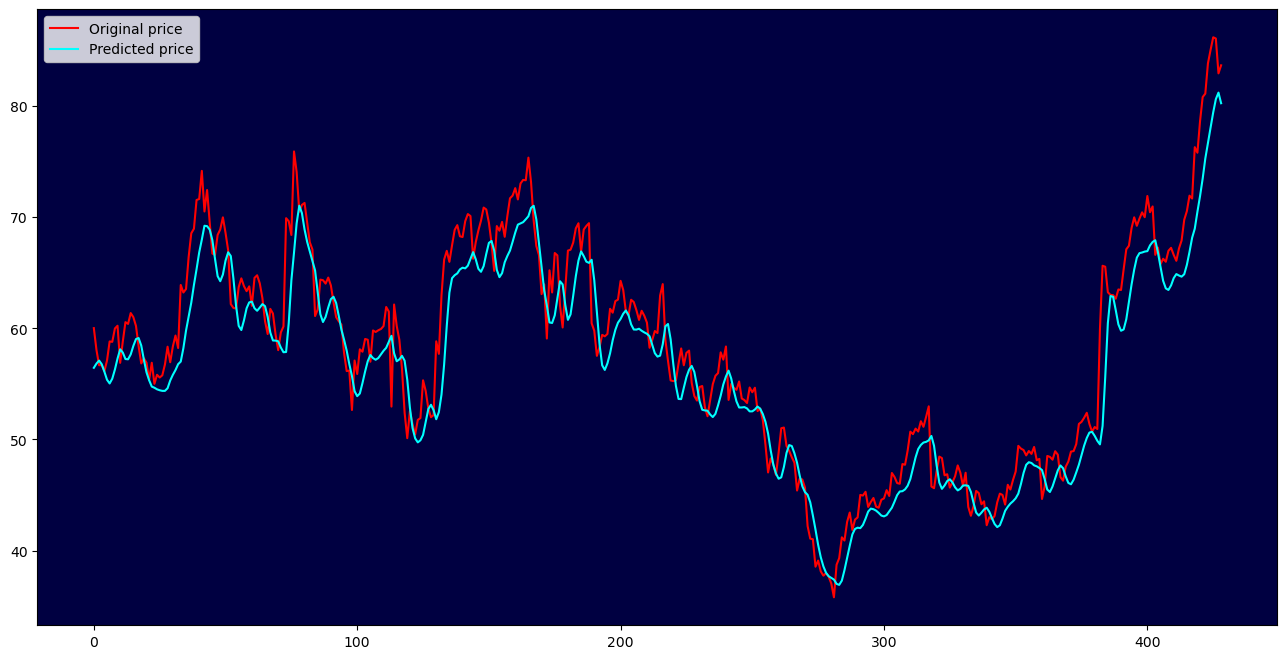

In [60]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()